In [1]:
import nltk
nltk.download("all")
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import *
from nltk import FreqDist
from nltk import *

!pip install konlpy
from konlpy.tag import Okt

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.utils import np_utils

from collections import Counter

import re

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import pandas as pd

import seaborn as sns

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

Using TensorFlow backend.


# RNN 기반의 텍스트 생성

## 데이터 전처리

In [0]:
from konlpy.corpus import kolaw

In [4]:
c = kolaw.open("constitution.txt").read()
c

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [5]:
sent_tokenize(c)

['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.',
 '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.',
 '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.',
 '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.',
 '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.',
 '제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.',
 '제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.',
 '제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.',
 '②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.',
 '제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.',
 '②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.',
 '제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.',
 '②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 

In [6]:
len(sent_tokenize(c))

357

In [7]:
sentents = [s for s in sent_tokenize(c)]
sentents[3]

'제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.'

In [8]:
okt = Okt()

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [11]:
# '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.' 에서 "제2조 ① "을 빼려고 한다
# 방법 1

for s in sent_tokenize(c):
  # print(okt.pos(s))    # 숫자의 품사는 Number, 원숫자기호의 품사는 Foreign
  # 그러므로 Number 또는 Foreign을 빼겠다
  for w, t in okt.pos(s):
    if t not in ["Number", "Foreign"] and w not in ["제", "조"]:
      print(w)

대한민국
헌법
유구
한
역사
와
전통
에
빛나는
우리
대
한
국민
은
·
운동
으로
건립
된
대한민국
임시정부
의
법
통과
불의
에
항거
한
·
민주
이념
을
계승
하고
,
조국
의
민주
개혁
과
평화
적
통일
의
사명
에
입
각하
여
정의
·
인도
와
동포
애
로써
민족
의
단결
을
공고
히
하고
,
모든
사회
적
폐습
과
불의
를
타파
하며
,
자율
과
조화
를
바탕
으로
자유민주
적
기
본
질서
를
더욱
확고히
하여
정치
·
경제
·
사회
·
문화
의
모든
영역
에
있어서
각인
의
기회
를
균등히
하고
,
능력
을
최고
도로
발휘
하게
하며
,
자유
와
권리
에
따르는
책임
과
의무
를
완수
하게
하여
,
안
으로는
국민
생활
의
균등한
향상
을
기하
고
밖
으로는
항구
적
인
세계
평화
와
인류
공영
에
이바지
함
으로써
우리
들
과
우리
들
의
자손
의
안전
과
자유
와
행복
을
영원히
확보
할
것
을
다짐
하면서
제정
되고
차
에
걸쳐
개정
된
헌법
을
이제
국회
의
의결
을
거쳐
국민투표
에
의하여
개정
한다
.
장
총
강
대한민국
은
민주공화국
이다
.
대한민국
의
주권
은
국민
에게
있고
,
모든
권력
은
국민
으로부터
나온다
.
대한민국
의
국민
이
되는
요건
은
법률
로
정
한다
.
국가
는
법률
이
정
하는
바
에
의하여
재외국민
을
보호
할
의무
를
진다
.
대한민국
의
영토
는
한반도
와
그
부속
도서
로
한다
.
대한민국
은
통일
을
지향
하며
,
자유민주
적
기
본
질서
에
입각
한
평화
적
통일
정책
을
수립
하고
이를
추진
한
다
.
대한민국
은
국제
평화
의
유지
에
노력
하고
침략
적
전쟁
을
부인
한다
.
국군
은
국가
의
안전보장
과
국토
방위
의
신성한
의무
를
수행
함
을
사명
으로
하며
,
그
정치
적
중립성
은
준수
된다
.
헌법
에
의하여
체결
·
공포
된
조약
과
일반
적
으로
승인
된
국제
법규
는
국내법
과
같은
효력
을
가진다
.
외국인
은
국제
법
과
조약
이
정
하는
바
에
의하여
그
지위
가
보장
된

In [12]:
# '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.' 에서 "제2조 ① "을 빼려고 한다
# 방법 2: 위 구문을 한줄로 축약

doc0 = [" ".join(["".join(w) for w, t in okt.pos(s) if w not in ["제", "조"] and t not in ["Number", "Foreign"]]) for s in sent_tokenize(c)]
doc0

['대한민국 헌법 유구 한 역사 와 전통 에 빛나는 우리 대 한 국민 은 · 운동 으로 건립 된 대한민국 임시정부 의 법 통과 불의 에 항거 한 · 민주 이념 을 계승 하고 , 조국 의 민주 개혁 과 평화 적 통일 의 사명 에 입 각하 여 정의 · 인도 와 동포 애 로써 민족 의 단결 을 공고 히 하고 , 모든 사회 적 폐습 과 불의 를 타파 하며 , 자율 과 조화 를 바탕 으로 자유민주 적 기 본 질서 를 더욱 확고히 하여 정치 · 경제 · 사회 · 문화 의 모든 영역 에 있어서 각인 의 기회 를 균등히 하고 , 능력 을 최고 도로 발휘 하게 하며 , 자유 와 권리 에 따르는 책임 과 의무 를 완수 하게 하여 , 안 으로는 국민 생활 의 균등한 향상 을 기하 고 밖 으로는 항구 적 인 세계 평화 와 인류 공영 에 이바지 함 으로써 우리 들 과 우리 들 의 자손 의 안전 과 자유 와 행복 을 영원히 확보 할 것 을 다짐 하면서 제정 되고 차 에 걸쳐 개정 된 헌법 을 이제 국회 의 의결 을 거쳐 국민투표 에 의하여 개정 한다 .',
 '장 총 강 대한민국 은 민주공화국 이다 .',
 '대한민국 의 주권 은 국민 에게 있고 , 모든 권력 은 국민 으로부터 나온다 .',
 '대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 .',
 '국가 는 법률 이 정 하는 바 에 의하여 재외국민 을 보호 할 의무 를 진다 .',
 '대한민국 의 영토 는 한반도 와 그 부속 도서 로 한다 .',
 '대한민국 은 통일 을 지향 하며 , 자유민주 적 기 본 질서 에 입각 한 평화 적 통일 정책 을 수립 하고 이를 추진 한 다 .',
 '대한민국 은 국제 평화 의 유지 에 노력 하고 침략 적 전쟁 을 부인 한다 .',
 '국군 은 국가 의 안전보장 과 국토 방위 의 신성한 의무 를 수행 함 을 사명 으로 하며 , 그 정치 적 중립성 은 준수 된다 .',
 '헌법 에 의하여 체결 · 공포 된 조약 과 일반 적 으로 승인 된 국제 법규 는 국내법 과 같은 효력 을 가진다 .',
 '

In [0]:
# '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.' 에서 "제2조 ① "을 빼려고 한다
# 방법 3: for문과 정규표현식 사용

ko_law = []
for s in sent_tokenize(c):
    temp = re.sub("[제조0-9①-⑮]","",s)
    ko_law.append(temp)

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(doc0)
tokenizer.word_index

{'의': 1,
 '에': 2,
 '을': 3,
 '은': 4,
 '이': 5,
 '한다': 6,
 '·': 7,
 '를': 8,
 '법률': 9,
 '는': 10,
 '한': 11,
 '할': 12,
 '정': 13,
 '수': 14,
 '대통령': 15,
 '과': 16,
 '국가': 17,
 '또는': 18,
 '국회': 19,
 '의하여': 20,
 '하는': 21,
 '국민': 22,
 '하여': 23,
 '로': 24,
 '관': 25,
 '있다': 26,
 '때': 27,
 '헌법': 28,
 '그': 29,
 '에는': 30,
 '가': 31,
 '으로': 32,
 '와': 33,
 '모든': 34,
 '바': 35,
 '위': 36,
 '적': 37,
 '하며': 38,
 '하여야': 39,
 '된': 40,
 '아니': 41,
 '기타': 42,
 '가진다': 43,
 '및': 44,
 '장': 45,
 '사항': 46,
 '인': 47,
 '에서': 48,
 '권리': 49,
 '안': 50,
 '된다': 51,
 '필요한': 52,
 '없다': 53,
 '의원': 54,
 '자유': 55,
 '정부': 56,
 '선거': 57,
 '임명': 58,
 '하고': 59,
 '되지': 60,
 '직무': 61,
 '국무총리': 62,
 '경제': 63,
 '의무': 64,
 '조직': 65,
 '자': 66,
 '하': 67,
 '국회의원': 68,
 '임기': 69,
 '의결': 70,
 '공무원': 71,
 '경우': 72,
 '이상': 73,
 '국무위원': 74,
 '대법원': 75,
 '하기': 76,
 '범위': 77,
 '이를': 78,
 '다': 79,
 '될': 80,
 '받지': 81,
 '법관': 82,
 '보호': 83,
 '정책': 84,
 '정당': 85,
 '헌법재판소': 86,
 '재적': 87,
 '회의': 88,
 '항의': 89,
 '관리': 90,
 '진다': 91,
 '노력': 92,
 '보장': 93,
 

In [15]:
tokenizer.texts_to_sequences(doc0)    # doc0에 있는 문장들을 인덱스로 인코딩

[[102,
  28,
  602,
  11,
  603,
  33,
  604,
  2,
  605,
  323,
  606,
  11,
  22,
  4,
  7,
  427,
  32,
  607,
  40,
  102,
  608,
  1,
  324,
  609,
  428,
  2,
  610,
  11,
  7,
  177,
  611,
  3,
  429,
  59,
  325,
  1,
  177,
  612,
  16,
  178,
  37,
  179,
  1,
  430,
  2,
  613,
  614,
  110,
  615,
  7,
  616,
  33,
  617,
  618,
  215,
  326,
  1,
  619,
  3,
  327,
  620,
  59,
  34,
  136,
  37,
  621,
  16,
  428,
  8,
  622,
  38,
  431,
  16,
  432,
  8,
  623,
  32,
  433,
  37,
  137,
  259,
  138,
  8,
  624,
  625,
  23,
  122,
  7,
  63,
  7,
  136,
  7,
  260,
  1,
  34,
  261,
  2,
  123,
  626,
  1,
  328,
  8,
  627,
  59,
  329,
  3,
  434,
  628,
  629,
  262,
  38,
  55,
  33,
  49,
  2,
  630,
  216,
  16,
  64,
  8,
  631,
  262,
  23,
  50,
  435,
  22,
  139,
  1,
  436,
  217,
  3,
  632,
  263,
  633,
  435,
  634,
  37,
  47,
  635,
  178,
  33,
  636,
  637,
  2,
  638,
  218,
  264,
  323,
  437,
  16,
  323,
  437,
  1,
  639,
  1,
  640,
  16,
 

In [16]:
doc = [l for l in tokenizer.texts_to_sequences(doc0) if len(l) > 1]
print(len(doc0))
print(len(doc))

357
354


In [17]:
print(doc0[3])
print(doc[3])

대한민국 의 국민 이 되는 요건 은 법률 로 정 한다 .
[102, 1, 22, 5, 111, 653, 4, 9, 24, 13, 6]


In [18]:
maxlen = max([len(x)-1 for x in doc])    # len(x): 각 문장을 구성하는 단어의 개수
print(maxlen)    # maxlen = 가장 많은 단어가 사용된 문장의 단어 개수

187


In [19]:
vocab_size = len(tokenizer.word_index)+1    # len(tokenizer.word_index): 전체 단어 수    # +1 한 이유는 0을 포함하기 위해
print(vocab_size)

1165


지금 하려는 것: 단어를 한개 이상 입력했을 때 그 다음에 어떤 단어가 올 수 있는지를 출력하려는 것

예: 대한민국 => 의/은/헌법  ||  대한민국 의 => 헌법/위치/크기/국민  ||  대한민국 의 헌법 => 은/을/... 

결국 문장을 완성하려는 것

In [25]:
# 데이터 전처리 함수 생성: 입출력 데이터 생성, padding

def generate_data(x, maxlen, vocab_size):
  for sentence in x:
    inputs = []
    targets = []
    for i in range(1, len(sentence)):
      inputs.append(sentence[0:i])
      targets.append(sentence[i])
    y = np_utils.to_categorical(targets, vocab_size)
    inputs_sequence = pad_sequences(inputs, maxlen=maxlen)
    yield(inputs_sequence, y)

for i, (x, y) in enumerate(generate_data(doc, maxlen, vocab_size)):
  print("인덱스 번호: ", i)
  print("x data: ", x.shape, "\n", x)
  print("y data: ", y.shape, "\n", y)

인덱스 번호:  0
x data:  (187, 187) 
 [[  0   0   0 ...   0   0 102]
 [  0   0   0 ...   0 102  28]
 [  0   0   0 ... 102  28 602]
 ...
 [  0   0 102 ... 647 155   2]
 [  0 102  28 ... 155   2  20]
 [102  28 602 ...   2  20 180]]
y data:  (187, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호:  1
x data:  (6, 187) 
 [[  0   0   0 ...   0   0  45]
 [  0   0   0 ...   0  45 439]
 [  0   0   0 ...  45 439 648]
 [  0   0   0 ... 439 648 102]
 [  0   0   0 ... 648 102   4]
 [  0   0   0 ... 102   4 649]]
y data:  (6, 1165) 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
인덱스 번호:  2
x data:  (12, 187) 
 [[  0   0   0 ...   0   0 102]
 [  0   0   0 ...   0 102   1]
 [  0   0   0 ... 102   1 440]
 ...
 [  0   0   0 ...  34 651   4]
 [  0   0   0 ... 651   4  22]
 [  0   0   0 

In [31]:
X = []
Y = []

for x, y in generate_data(doc, maxlen, vocab_size):
  X.append(x)
  Y.append(y)
X = np.concatenate(X)    # concatenate 함수: 배열들을 연결해 배열 구하기
Y = np.concatenate(Y)

print(X.shape)
print(Y.shape)

(6917, 187)
(6917, 1165)


## 모델 생성

In [33]:
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=maxlen))    # (None, 187, 100)
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(vocab_size, activation="softmax"))    # 단어 하나가 출력되어야 한다 -> 단어 종류 개수가 출력된다
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 187, 100)          116500    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1165)              117665    
Total params: 314,565
Trainable params: 314,565
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
hist = model.fit(X, Y, epochs=500, batch_size=800, verbose=2)

W0830 01:37:37.054582 139706046617472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
 - 27s - loss: 6.6984 - acc: 0.0207
Epoch 2/500
 - 25s - loss: 5.8536 - acc: 0.0383
Epoch 3/500
 - 25s - loss: 5.7520 - acc: 0.0454
Epoch 4/500
 - 25s - loss: 5.7364 - acc: 0.0457
Epoch 5/500
 - 25s - loss: 5.7167 - acc: 0.0512
Epoch 6/500
 - 25s - loss: 5.6985 - acc: 0.0479
Epoch 7/500
 - 25s - loss: 5.6718 - acc: 0.0529
Epoch 8/500
 - 25s - loss: 5.6593 - acc: 0.0497
Epoch 9/500
 - 25s - loss: 5.6249 - acc: 0.0494
Epoch 10/500
 - 25s - loss: 5.5931 - acc: 0.0512
Epoch 11/500
 - 25s - loss: 5.5562 - acc: 0.0519
Epoch 12/500
 - 25s - loss: 5.5150 - acc: 0.0562
Epoch 13/500
 - 25s - loss: 5.4751 - acc: 0.0545
Epoch 14/500
 - 25s - loss: 5.4352 - acc: 0.0544
Epoch 15/500
 - 25s - loss: 5.3918 - acc: 0.0575
Epoch 16/500
 - 25s - loss: 5.3609 - acc: 0.0549
Epoch 17/500
 - 25s - loss: 5.3241 - acc: 0.0588
Epoch 18/500
 - 25s - loss: 5.2810 - acc: 0.0587
Epoch 19/500
 - 25s - loss: 5.2374 - acc: 0.0629
Epoch 20/500
 - 25s - loss: 5.2024 - acc: 0.0672
Epoch 21/500
 - 25s - loss: 5

In [0]:
# 모델 저장

model.save("rnn_text_gen.hdf5")

In [0]:
# 모델 불러오기

from keras.models import *
mymodel = load_model("rnn_text_gen.hdf5")

## 예측

In [39]:
word_list = "대한민국 의 국민 이 되는 요건 은 법률 로 정한 다 .".split(" ")
word_list

['대한민국', '의', '국민', '이', '되는', '요건', '은', '법률', '로', '정한', '다', '.']

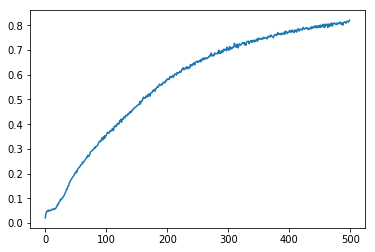

In [40]:
plt.plot(hist.history["acc"])
plt.show()

In [41]:
tokenizer.word_index    # 1164개

{'의': 1,
 '에': 2,
 '을': 3,
 '은': 4,
 '이': 5,
 '한다': 6,
 '·': 7,
 '를': 8,
 '법률': 9,
 '는': 10,
 '한': 11,
 '할': 12,
 '정': 13,
 '수': 14,
 '대통령': 15,
 '과': 16,
 '국가': 17,
 '또는': 18,
 '국회': 19,
 '의하여': 20,
 '하는': 21,
 '국민': 22,
 '하여': 23,
 '로': 24,
 '관': 25,
 '있다': 26,
 '때': 27,
 '헌법': 28,
 '그': 29,
 '에는': 30,
 '가': 31,
 '으로': 32,
 '와': 33,
 '모든': 34,
 '바': 35,
 '위': 36,
 '적': 37,
 '하며': 38,
 '하여야': 39,
 '된': 40,
 '아니': 41,
 '기타': 42,
 '가진다': 43,
 '및': 44,
 '장': 45,
 '사항': 46,
 '인': 47,
 '에서': 48,
 '권리': 49,
 '안': 50,
 '된다': 51,
 '필요한': 52,
 '없다': 53,
 '의원': 54,
 '자유': 55,
 '정부': 56,
 '선거': 57,
 '임명': 58,
 '하고': 59,
 '되지': 60,
 '직무': 61,
 '국무총리': 62,
 '경제': 63,
 '의무': 64,
 '조직': 65,
 '자': 66,
 '하': 67,
 '국회의원': 68,
 '임기': 69,
 '의결': 70,
 '공무원': 71,
 '경우': 72,
 '이상': 73,
 '국무위원': 74,
 '대법원': 75,
 '하기': 76,
 '범위': 77,
 '이를': 78,
 '다': 79,
 '될': 80,
 '받지': 81,
 '법관': 82,
 '보호': 83,
 '정책': 84,
 '정당': 85,
 '헌법재판소': 86,
 '재적': 87,
 '회의': 88,
 '항의': 89,
 '관리': 90,
 '진다': 91,
 '노력': 92,
 '보장': 93,
 

In [42]:
tokenizer.word_index.items()

dict_items([('의', 1), ('에', 2), ('을', 3), ('은', 4), ('이', 5), ('한다', 6), ('·', 7), ('를', 8), ('법률', 9), ('는', 10), ('한', 11), ('할', 12), ('정', 13), ('수', 14), ('대통령', 15), ('과', 16), ('국가', 17), ('또는', 18), ('국회', 19), ('의하여', 20), ('하는', 21), ('국민', 22), ('하여', 23), ('로', 24), ('관', 25), ('있다', 26), ('때', 27), ('헌법', 28), ('그', 29), ('에는', 30), ('가', 31), ('으로', 32), ('와', 33), ('모든', 34), ('바', 35), ('위', 36), ('적', 37), ('하며', 38), ('하여야', 39), ('된', 40), ('아니', 41), ('기타', 42), ('가진다', 43), ('및', 44), ('장', 45), ('사항', 46), ('인', 47), ('에서', 48), ('권리', 49), ('안', 50), ('된다', 51), ('필요한', 52), ('없다', 53), ('의원', 54), ('자유', 55), ('정부', 56), ('선거', 57), ('임명', 58), ('하고', 59), ('되지', 60), ('직무', 61), ('국무총리', 62), ('경제', 63), ('의무', 64), ('조직', 65), ('자', 66), ('하', 67), ('국회의원', 68), ('임기', 69), ('의결', 70), ('공무원', 71), ('경우', 72), ('이상', 73), ('국무위원', 74), ('대법원', 75), ('하기', 76), ('범위', 77), ('이를', 78), ('다', 79), ('될', 80), ('받지', 81), ('법관', 82), ('보호', 83), ('정책', 84), ('정당', 

In [44]:
reversed_word_map = dict(map(reversed, tokenizer.word_index.items()))
reversed_word_map

{1: '의',
 2: '에',
 3: '을',
 4: '은',
 5: '이',
 6: '한다',
 7: '·',
 8: '를',
 9: '법률',
 10: '는',
 11: '한',
 12: '할',
 13: '정',
 14: '수',
 15: '대통령',
 16: '과',
 17: '국가',
 18: '또는',
 19: '국회',
 20: '의하여',
 21: '하는',
 22: '국민',
 23: '하여',
 24: '로',
 25: '관',
 26: '있다',
 27: '때',
 28: '헌법',
 29: '그',
 30: '에는',
 31: '가',
 32: '으로',
 33: '와',
 34: '모든',
 35: '바',
 36: '위',
 37: '적',
 38: '하며',
 39: '하여야',
 40: '된',
 41: '아니',
 42: '기타',
 43: '가진다',
 44: '및',
 45: '장',
 46: '사항',
 47: '인',
 48: '에서',
 49: '권리',
 50: '안',
 51: '된다',
 52: '필요한',
 53: '없다',
 54: '의원',
 55: '자유',
 56: '정부',
 57: '선거',
 58: '임명',
 59: '하고',
 60: '되지',
 61: '직무',
 62: '국무총리',
 63: '경제',
 64: '의무',
 65: '조직',
 66: '자',
 67: '하',
 68: '국회의원',
 69: '임기',
 70: '의결',
 71: '공무원',
 72: '경우',
 73: '이상',
 74: '국무위원',
 75: '대법원',
 76: '하기',
 77: '범위',
 78: '이를',
 79: '다',
 80: '될',
 81: '받지',
 82: '법관',
 83: '보호',
 84: '정책',
 85: '정당',
 86: '헌법재판소',
 87: '재적',
 88: '회의',
 89: '항의',
 90: '관리',
 91: '진다',
 92: '노력',
 93: '보장',
 

In [45]:
x = pad_sequences([[tokenizer.word_index[w] for w in word_list[:2]]], maxlen=maxlen)
x

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [53]:
model.predict(x)

array([[1.9947860e-08, 5.4184442e-05, 5.7769317e-05, ..., 3.3983542e-05,
        1.6388517e-08, 1.6691573e-06]], dtype=float32)

In [46]:
np.shape(model.predict(x))

(1, 1165)

In [56]:
p = model.predict(x)[0]
print(p.shape)
print(p)

(1165,)
[1.9947860e-08 5.4184442e-05 5.7769317e-05 ... 3.3983542e-05 1.6388517e-08
 1.6691573e-06]


In [48]:
np.argmax(p)

441

In [51]:
idx = np.flip(np.argsort(p), 0)    # argsort: 정렬한 후에 인덱스를 출력
idx

array([441, 440,  22, ..., 579, 376,  39])

In [52]:
for i in idx[:5]:
  print(reversed_word_map[i])

영토
주권
국민
종류
임기


In [63]:
def predict_word(i, n=1):    # i: 문장의 i번째 단어    # n: 가장 확률이 높은 n개의 단어 출력하라는 의미
  x = pad_sequences([[tokenizer.word_index[w] for w in word_list[:i]]], maxlen=maxlen)
  p = model.predict(x)[0]
  idx = np.flip(np.argsort(p), 0)
  for k in idx[:n]:
    print('"', " ".join(word_list[:i]), '"', reversed_word_map[k], " (p = {:4.2f}%)".format(100*p[k]))

predict_word(1, n=3)

" 대한민국 " 의  (p = 56.51%)
" 대한민국 " 은  (p = 29.46%)
" 대한민국 " 경제  (p = 4.59%)


In [64]:
predict_word(3, n=5)

" 대한민국 의 국민 " 은  (p = 54.70%)
" 대한민국 의 국민 " 이  (p = 9.53%)
" 대한민국 의 국민 " 경제  (p = 9.04%)
" 대한민국 의 국민 " 에게  (p = 5.48%)
" 대한민국 의 국민 " ·  (p = 4.30%)
